<a href="https://colab.research.google.com/github/massinoLight/tp_AlgoBD/blob/main/TP_pyspark_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyspark

     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 198 kB 49.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=dc531246fcc963791511b72e8740ef61ff8cba4093a42411304f752477e4d2ff
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [92]:
import pandas as pd

url = 'https://raw.githubusercontent.com/massinoLight/tp_AlgoBD/main/iris.csv'

df=pd.read_csv(url)

df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**On lit la BD avec panda car la librérie pyspark pour le read csv nest pas stable**

#load data as Spark DataFrame
data2=spark.read.format("csv") \
    .option("header","true") \
    .option("mode","DROPMALFORMED") \
    .load('C:\\Users\\Dell\\Desktop\\iris.csv')

##On transforme la df panda en rdd pyspark 

In [ ]:
from pyspark.sql import SparkSession
spark= SparkSession.builder \
    .master("local") \
    .appName("Data Exploration") \
    .getOrCreate()

irisSparkDF=spark.createDataFrame(df)
irisSparkDF.printSchema()
irisSparkDF.show() 


    



root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- class: string (nullable = true)

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|      class|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|
|         4.9| 

##on passe la rdd au bon format features label

In [ ]:
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors

trainingData=irisSparkDF.rdd.map(lambda x:(Vectors.dense(x[0:-1]), x[-1])).toDF(["features", "label"])
trainingData.show()
# +-----------------

+-----------------+-----------+
|         features|      label|
+-----------------+-----------+
|[5.1,3.5,1.4,0.2]|Iris-setosa|
|[4.9,3.0,1.4,0.2]|Iris-setosa|
|[4.7,3.2,1.3,0.2]|Iris-setosa|
|[4.6,3.1,1.5,0.2]|Iris-setosa|
|[5.0,3.6,1.4,0.2]|Iris-setosa|
|[5.4,3.9,1.7,0.4]|Iris-setosa|
|[4.6,3.4,1.4,0.3]|Iris-setosa|
|[5.0,3.4,1.5,0.2]|Iris-setosa|
|[4.4,2.9,1.4,0.2]|Iris-setosa|
|[4.9,3.1,1.5,0.1]|Iris-setosa|
|[5.4,3.7,1.5,0.2]|Iris-setosa|
|[4.8,3.4,1.6,0.2]|Iris-setosa|
|[4.8,3.0,1.4,0.1]|Iris-setosa|
|[4.3,3.0,1.1,0.1]|Iris-setosa|
|[5.8,4.0,1.2,0.2]|Iris-setosa|
|[5.7,4.4,1.5,0.4]|Iris-setosa|
|[5.4,3.9,1.3,0.4]|Iris-setosa|
|[5.1,3.5,1.4,0.3]|Iris-setosa|
|[5.7,3.8,1.7,0.3]|Iris-setosa|
|[5.1,3.8,1.5,0.3]|Iris-setosa|
+-----------------+-----------+
only showing top 20 rows



##On applique l'ACP (2 features)

In [ ]:
from pyspark.ml.feature import PCA as PCAml
from pyspark.ml.linalg import Vectors 



pca = PCAml(k=2, inputCol="features", outputCol="pca")
model = pca.fit(trainingData)
transformed = model.transform(trainingData)

In [ ]:
type(transformed)

pyspark.sql.dataframe.DataFrame

In [ ]:
transformed.show()

+-----------------+-----------+--------------------+
|         features|      label|                 pca|
+-----------------+-----------+--------------------+
|[5.1,3.5,1.4,0.2]|Iris-setosa|[-2.8271359726790...|
|[4.9,3.0,1.4,0.2]|Iris-setosa|[-2.7959524821488...|
|[4.7,3.2,1.3,0.2]|Iris-setosa|[-2.6215235581650...|
|[4.6,3.1,1.5,0.2]|Iris-setosa|[-2.7649059004742...|
|[5.0,3.6,1.4,0.2]|Iris-setosa|[-2.7827501159516...|
|[5.4,3.9,1.7,0.4]|Iris-setosa|[-3.2314457367733...|
|[4.6,3.4,1.4,0.3]|Iris-setosa|[-2.6904524156023...|
|[5.0,3.4,1.5,0.2]|Iris-setosa|[-2.8848611044591...|
|[4.4,2.9,1.4,0.2]|Iris-setosa|[-2.6233845324473...|
|[4.9,3.1,1.5,0.1]|Iris-setosa|[-2.8374984110638...|
|[5.4,3.7,1.5,0.2]|Iris-setosa|[-3.0048163084440...|
|[4.8,3.4,1.6,0.2]|Iris-setosa|[-2.8982003795119...|
|[4.8,3.0,1.4,0.1]|Iris-setosa|[-2.7239091217858...|
|[4.3,3.0,1.1,0.1]|Iris-setosa|[-2.2861426515079...|
|[5.8,4.0,1.2,0.2]|Iris-setosa|[-2.8677998808418...|
|[5.7,4.4,1.5,0.4]|Iris-setosa|[-3.12747377398

##afficher une colum d'une RDD 
df.select("col").rdd.flatMap(list).collect()

In [ ]:
transformed.select("pca").show()

+--------------------+
|                 pca|
+--------------------+
|[-2.8271359726790...|
|[-2.7959524821488...|
|[-2.6215235581650...|
|[-2.7649059004742...|
|[-2.7827501159516...|
|[-3.2314457367733...|
|[-2.6904524156023...|
|[-2.8848611044591...|
|[-2.6233845324473...|
|[-2.8374984110638...|
|[-3.0048163084440...|
|[-2.8982003795119...|
|[-2.7239091217858...|
|[-2.2861426515079...|
|[-2.8677998808418...|
|[-3.1274737739836...|
|[-2.8888168946571...|
|[-2.8630203653038...|
|[-3.3122651363522...|
|[-2.9239969088652...|
+--------------------+
only showing top 20 rows



In [ ]:
type(transformed.select("pca"))

pyspark.sql.column.Column

In [ ]:
from pyspark.ml.functions import vector_to_array

df1 = transformed.select(vector_to_array("pca").alias("pca"))

In [ ]:
pdf = df1.toPandas()
pdf

,pca
0,"[-2.8271359726790286, -5.641331045573357]"
1,"[-2.7959524821488464, -5.1451668832529425]"
2,"[-2.62152355816506, -5.17737812120394]"
3,"[-2.764905900474242, -5.003599415056977]"
4,"[-2.7827501159516626, -5.648648294377423]"
...,...
145,"[-7.455360146660716, -5.502138952854981]"
146,"[-7.03700672909685, -4.939702882617144]"
147,"[-7.275389033309962, -5.393242917238325]"
148,"[-7.4129721730712115, -5.430600479056934]"


In [ ]:
pdf = df1.toPandas()
x_setosa=[]
y_setosa=[]

x_versicolor=[]
y_versicolor=[]

x_virginica=[]
y_virginica=[]

for i in range(0,50):
   x_setosa.append(pdf['pca'][i][0])
   y_setosa.append(pdf['pca'][i][1])

for i in range(50,100):
   x_versicolor.append(pdf['pca'][i][0])
   y_versicolor.append(pdf['pca'][i][1])

for i in range(100,len(pdf)):
   x_virginica.append(pdf['pca'][i][0])
   y_virginica.append(pdf['pca'][i][1])      



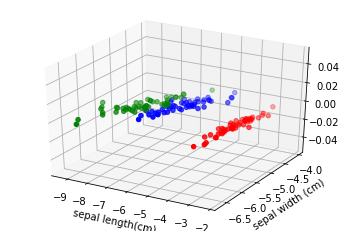

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_setosa, y_setosa, c='r', marker='o')
ax.scatter(x_versicolor, y_versicolor, c='b', marker='o')
ax.scatter(x_virginica, y_virginica, c='g', marker='o')

ax.set_xlabel('sepal length(cm)')
ax.set_ylabel('sepal width (cm)')


plt.show()   

In [ ]:
x=x_setosa+x_versicolor+x_virginica
y=y_setosa+y_versicolor+y_virginica
from scipy.stats import pearsonr

corr, _ = pearsonr(x, y)
corr

-9.194116274392545e-16

##Spark Session initialization

In [2]:
from pyspark.sql import SparkSession
spark = (SparkSession
         .builder
         .appName("news")
         .enableHiveSupport()
         .getOrCreate())

##Load dataset

In [19]:
dfIris = spark.read.csv("/content/sample_data/iris.csv", header=True, inferSchema=True, mode="DROPMALFORMED", encoding='UTF-8')
dfMnist = spark.read.csv("/content/sample_data/mnist_train_small.csv", header=True, inferSchema=True, mode="DROPMALFORMED", encoding='UTF-8')

In [21]:
dfIris.show()

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|      class|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         4.8|        3.4|         1.6|        0.2|Iris-setosa|
|         4.8|        3.0|         1.4| 

In [22]:
dfIris.columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

##Data format conversion

In [23]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=df.columns[0:4], outputCol="variable")

feature_vectors = assembler.transform(dfIris)
feature_vectors.show(truncate=False)

+------------+-----------+------------+-----------+-----------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|class      |variable         |
+------------+-----------+------------+-----------+-----------+-----------------+
|5.1         |3.5        |1.4         |0.2        |Iris-setosa|[5.1,3.5,1.4,0.2]|
|4.9         |3.0        |1.4         |0.2        |Iris-setosa|[4.9,3.0,1.4,0.2]|
|4.7         |3.2        |1.3         |0.2        |Iris-setosa|[4.7,3.2,1.3,0.2]|
|4.6         |3.1        |1.5         |0.2        |Iris-setosa|[4.6,3.1,1.5,0.2]|
|5.0         |3.6        |1.4         |0.2        |Iris-setosa|[5.0,3.6,1.4,0.2]|
|5.4         |3.9        |1.7         |0.4        |Iris-setosa|[5.4,3.9,1.7,0.4]|
|4.6         |3.4        |1.4         |0.3        |Iris-setosa|[4.6,3.4,1.4,0.3]|
|5.0         |3.4        |1.5         |0.2        |Iris-setosa|[5.0,3.4,1.5,0.2]|
|4.4         |2.9        |1.4         |0.2        |Iris-setosa|[4.4,2.9,1.4,0.2]|
|4.9         |3.

##Normalisé le resultat

In [27]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="variable", outputCol="Standardized", withStd=True, withMean=True)
scalerModel = scaler.fit(feature_vectors)
std_feature_vectors = scalerModel.transform(feature_vectors)
std_feature_vectors.select("Standardized").show(truncate=False)

+---------------------------------------------------------------------------------+
|Standardized                                                                     |
+---------------------------------------------------------------------------------+
|[-0.8976738791967643,1.0286112808972372,-1.3367940202882502,-1.308592819437957]  |
|[-1.1392004834649512,-0.12454037930145648,-1.3367940202882502,-1.308592819437957]|
|[-1.3807270877331392,0.33672028477802146,-1.393469854952817,-1.308592819437957]  |
|[-1.5014903898672336,0.10608995273828248,-1.2801181856236834,-1.308592819437957] |
|[-1.0184371813308577,1.2592416129369763,-1.3367940202882502,-1.308592819437957]  |
|[-0.5353839727944818,1.951132609056192,-1.16676651629455,-1.046524831566537]     |
|[-1.5014903898672336,0.7979809488574984,-1.3367940202882502,-1.177558825502247]  |
|[-1.0184371813308577,0.7979809488574984,-1.2801181856236834,-1.308592819437957]  |
|[-1.7430169941354205,-0.35517071134119543,-1.3367940202882502,-1.3085928194

##Application de l'ACP (deux features)

In [31]:
from pyspark.ml.feature import PCA

# build PCA model
pca = PCA(k=2, inputCol="Standardized", outputCol="Main component score")
pcaModel = pca.fit(std_feature_vectors)

print("====Eigenvector====")
print(pcaModel.pc)

print("====Contribution rate====")
print(pcaModel.explainedVariance)

pca_score = pcaModel.transform(std_feature_vectors).select("Main component score")


pca_score.show(truncate=False)

====Eigenvector====
DenseMatrix([[-0.52237162, -0.37231836],
             [ 0.26335492, -0.92555649],
             [-0.58125401, -0.02109478],
             [-0.56561105, -0.06541577]])
====Contribution rate====
[0.7277045209380137,0.23030523267680608]
+-----------------------------------------+
|Main component score                     |
+-----------------------------------------+
|[2.2569806330680264,-0.5040154042276581] |
|[2.079459118895403,0.6532163936125837]   |
|[2.360044081584208,0.317413944570277]    |
|[2.296503660003885,0.5734466129712272]   |
|[2.380801586452744,-0.6725144107910821]  |
|[2.0636234763372356,-1.5134782667356748] |
|[2.437545335732414,-0.07431371713320101] |
|[2.226383267407072,-0.24678717174216824] |
|[2.334138096440084,1.091489770195829]    |
|[2.1813679694194783,0.4471311174501041]  |
|[2.1562628748102597,-1.0670209564555646] |
|[2.3196068551308358,-0.15805794582010124]|
|[2.2166567155972636,0.7067504781046756]  |
|[2.6309024924632047,0.9351491453748151]  |


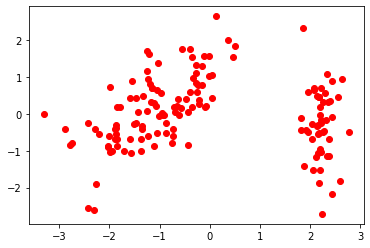

In [58]:
import matplotlib.pyplot as plt
pdf = pca_score.toPandas()
X=[]
Y=[]
for i in range(0,len(pdf)):
  X.append(pdf['Main component score'][i][0])
  Y.append(pdf['Main component score'][i][1])

plt.scatter(X, Y, c = 'red')